# Loading and processing the data sets

Let's start with loading the training data:

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.listdir()

['.DS_Store',
 '.git',
 '.ipynb_checkpoints',
 '.Rapp.history',
 '.RDataTmp',
 '.Rhistory',
 'GBM.rds',
 'GBM.stack.rds',
 'Kaggle Mercari Price Suggestion Challenge IPython Kernel.ipynb',
 'KaggleMercariPriceSuggestionChallengeKernel.Rmd',
 'Mercari Price Suggestion Challenge | Kaggle.pdf',
 'merged_table.rds',
 'mini_subtrain.rds',
 'mini_subtrain_locked.rds',
 'mini_train.rds',
 'new_stack_set.rds',
 'new_stack_set2.rds',
 'RF.BC.rds',
 'RF.rds',
 'RF.stack.rds',
 'RF.stack2nd.rds',
 'sample_submission.csv',
 'sample_submission.csv.7z',
 'second.stack.set.rds',
 'subtrain.rds',
 'subtrain_locked.rds',
 'SVM.rds',
 'SVM.stack.rds',
 'test.csv',
 'test.rds',
 'test.tsv.7z',
 'test_locked.rds',
 'train.csv',
 'train.rds',
 'train.tsv.7z',
 'v.txt',
 'validation.rds',
 'validation_locked.rds',
 'X_holdout.csv',
 'X_train.csv',
 'xGBM.BC.rds',
 'xGBM.BC2.rds',
 'xGBM.rds',
 'xGBM.stack.rds',
 'xGBM.stack2nd.rds',
 'y_holdout.csv',
 'y_train.csv']

In [72]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


First, let's remove the train_id from the training set, and map the numeric and character variables to being with:

In [78]:
train = train.drop("train_id",axis = 1)
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 7 columns):
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 79.2+ MB


In [85]:
Numeric_features_select = np.logical_or((pd.Series(train.dtypes)) == "int64",(pd.Series(train.dtypes) == "float64")).tolist()

In [86]:
Numeric_features = pd.Series(train.columns)[Numeric_features_select].tolist()

In [88]:
Numeric_features.remove('price')

In [89]:
Numeric_features

['item_condition_id', 'shipping']

In [11]:
Text_features = pd.Series(train.columns)[np.logical_not(Numeric_features_select)].tolist()

In [12]:
Text_features

['name', 'category_name', 'brand_name', 'item_description']

Since the model evaluation will be based on the log of the target variable price, we convert it at this stage:

In [13]:
train.price = pd.Series(np.log(train.price + 1))

In [14]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,2.397895,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,3.970292,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,2.397895,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,3.583519,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,3.806662,0,Complete with certificate of authenticity


Now it is time to split the training data set into training and holdout sets in order to start building our pipeline:

In [15]:
from sklearn.model_selection import train_test_split

X = train.drop("price", axis = 1)
y = train.price

In [16]:
X_train,X_holdout,y_train,y_holdout = train_test_split(X,y,test_size = 0.4, random_state = 425)

In [17]:
type(X_train)

pandas.core.frame.DataFrame

In [18]:
type(y_holdout)

pandas.core.series.Series

In [19]:
X_train.shape

(889521, 6)

In [20]:
X_holdout.shape

(593014, 6)

In [21]:
y_train.shape

(889521,)

In [22]:
y_holdout.shape

(593014,)

At this stage, let's lockdown and save the datasets on which we will train and validate our model:

In [2]:
X_train.to_csv("X_train.csv",index=False)
X_holdout.to_csv("X_holdout.csv", index = False)
y_train.to_csv("y_train.csv", index= False)
y_holdout.to_csv("y_holdout.csv", index= False)

NameError: name 'X_train' is not defined

In [91]:
# Write the pickled feature names
import pickle
with open("Numeric_features.pkl", 'wb') as f:
    pickle.dump(Numeric_features,f)
f.close()

with open("Text_features.pkl", 'wb') as f:
    pickle.dump(Text_features,f)
f.close()

# Data processing and model training pipeline

At this stage we will make high-level design for our data processing and model training pipeline. At minimum, our pipeline will need to include the following steps:

1. We need to process text and numeric features seperately, then combine them using FeatureUnion()

    2. Text  subpipeline should include:
        - A function that will merge all text in a given row to make it ready for tokenization. 
            - This function should take care of converting missing values to empty strings. 
            - It should also convert the text to lowercase.
        - We should remove common stop words and perform text stemming
        - We should tokenize using alphanumeric characters only (white space + punctuation are used as delimiters)
        - We try to include up to 3-grams

    3. Numeric subpipeline should include:
        - An imputation step to fill any missing values using mean of the column
        - A scaling step that will scale the numeric values between -1 and 1
        
4. After merging the numeric and text features we will add the following common steps:
    5. Adding interaction terms
    6. Perform a simple feature selection using F-regression method we learned
    7. We will try to include a hashing step to improve computational efficiency
7. Finally, we will put a model training step, we will start with a regularized linear regression.

Once our pipeline is ready, our goals will be:

- to get some idea about the initial performance of the pipeline using the simple model in holdout set, using default hyperparameters
- then try to perform hyperparameter tuning (such as GridSearchCV or RandomSearchCV) to see if we can come up with a better model. 
- save the model that has the best overall performance ( based on rmse using holdout set)

Finally, we will repeat these steps using the same pipeline, but changing model structure to train:

- Elastic Net model
- Support vector machines
- RandomForest regression
- Gradient boosting

After these steps, we will explore ensembling these models to see if we can get a better model.

At the end of this exercise, we expect to get more competent on:

1. experiencing developing sklearn pipelines and incorporating custom functions
2. basic NLP tasks we can perform with our current knowledge
3. developing an intuition about the performance of different models, 
4. experiencing the sklearn API for hyperparameter tuning using important algorithms 

Finally, we will try to use the same sets to train Deep Neural Networks to see how they compare to the performance of shallow learning approaches.  

In [2]:
import os
import pandas as pd
import numpy as np
import pickle

# Re-read the training data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names= ["price"])

y_train = y_train.price.values

# Re-read the pickled feature names
import pickle
with open("Numeric_features.pkl", 'rb') as f:
    Numeric_features = pickle.load(f)
f.close()

with open("Text_features.pkl", 'rb') as f:
    Text_features = pickle.load(f)
f.close()

## A custom function for text pre-processing

In [3]:
def column_text_processer(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    
    # Convert all the text to lowercase and return as pd.Series object to enter the tokenization pipeline
    return text_vector.apply(lambda x: x.lower())   

## Building the model training pipeline

We will start by loading the necessary functions from sklearn submodules:

In [4]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import MaxAbsScaler, Imputer, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression

First we build two utility functions to parse numeric and text data, and wrap them using FunctionTransformer, so that they can be integrated into a sklearn pipeline:

In [5]:
get_numeric_data = FunctionTransformer(func = lambda x: x[Numeric_features], validate=False) #Note x is by default the tensor that contains all features
get_text_data = FunctionTransformer(column_text_processer,validate=False) # Note how we avoid putting any arguments into column_text_processer

We also need to create our regex token pattern to use in CountVectorizer. CountVectorizer will use this regex pattern to create tokens and n-grams we specified. It will automatically convert these into dummy features and stores in the form of a sparsemartix. Note that we will use HashingVectorizer to improve computational efficiency.

In [6]:
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'   #Note this regex will match either a whitespace or a punctuation to tokenize the string vector on these preferences  

We also need to redefine the default feature selection function for regression to properly place into our pipeline:

In [7]:
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center = False) # default is center = True

We can now start building the actual pipeline:

In [8]:
pl1 = Pipeline([
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        transformer_list = [
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    #("int", SparseInteractions(degree=2)), # Add polynomial interaction terms :POSTPONED
    ("scaler",MaxAbsScaler()), # Scale the features
])

In [9]:
# We fit_transform X outside of the pipeline to obtain transformed X for hyperparameter search, 
# since transformation step takes long time and we want to avoid repeating everytime 
X_train_transformed = pl1.fit_transform(X_train,y_train) 

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: i

In [6]:
# We start with ridge regression
model1 = Ridge(alpha=0.5)
model1.fit(X_train_transformed, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
y_pred1 = model1.predict(X_train_transformed)

In [8]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,y_pred1))

0.63839928042826788

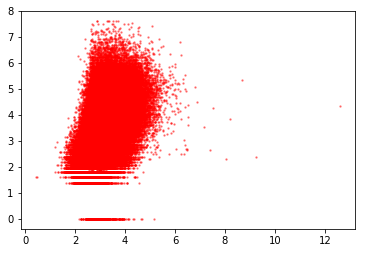

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_pred1,y_train, s = 2, c = "r", alpha = 0.4)
plt.show()

This simple pipeline already looks very promising!

## Ridge Hyperparameter tuning

First, we compile the data loading, utility functions and pipeline steps for easy starting up later:

In [73]:
import os
import pandas as pd
import numpy as np
import pickle

#############################################################################
# Re-read the training data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names= ["price"])

y_train = y_train.price.values

#############################################################################
# Re-read the pickled feature names
import pickle
with open("Numeric_features.pkl", 'rb') as f:
    Numeric_features = pickle.load(f)
f.close()

with open("Text_features.pkl", 'rb') as f:
    Text_features = pickle.load(f)
f.close()
#############################################################################

def column_text_processer(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    
    # Convert all the text to lowercase and return as pd.Series object to enter the tokenization pipeline
    return text_vector.apply(lambda x: x.lower())  

#############################################################################

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import MaxAbsScaler, Imputer, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression

#############################################################################
# Utility functions to parse text and numeric features
get_numeric_data = FunctionTransformer(func = lambda x: x[Numeric_features], validate=False) #Note x is by default the tensor that contains all features
get_text_data = FunctionTransformer(column_text_processer,validate=False) # Note how we avoid putting any arguments into column_text_processer
#############################################################################

#############################################################################
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'   #Note this regex will match either a whitespace or a punctuation to tokenize the string vector on these preferences  

#############################################################################
# Define f_regression for feature selection with center = True default
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center = False) # default is center = True

#############################################################################
# Prepare the actual pipeline:

pl1 = Pipeline([
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        transformer_list = [
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    #("int", SparseInteractions(degree=2)), # Add polynomial interaction terms :POSTPONED
    ("scaler",MaxAbsScaler()), # Scale the features
])

In [74]:
# We fit_transform X outside of the pipeline to obtain transformed X for hyperparameter search, 
# since transformation step takes long time and we want to avoid repeating everytime 
X_train_transformed = pl1.fit_transform(X_train,y_train) 

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


KeyboardInterrupt: 

We can now start hyperparameter optimization. Let's first start by looking into the tunable hyperparameters in ridge model:

In [11]:
# looking into parameters of our first estimator:

model1.get_params()


{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Let's plan to start by tuning the alpha, which is the most important hyperparameter that defines the strength of regularization. A sensible value is between 1 and 0. We will use Exhaustive search over specified parameter values for an estimator, which is performed by **GridSearchCV** using 5 fold cross-validation. Since we only perform search in one hyperparameter, this is a one-dimensional grid search:

In [12]:
# We prepare 20 grids of alpha in a linear space
alpha_space = np.linspace(1,0,20)
alpha_space

array([ 1.        ,  0.94736842,  0.89473684,  0.84210526,  0.78947368,
        0.73684211,  0.68421053,  0.63157895,  0.57894737,  0.52631579,
        0.47368421,  0.42105263,  0.36842105,  0.31578947,  0.26315789,
        0.21052632,  0.15789474,  0.10526316,  0.05263158,  0.        ])

In [15]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

In [22]:
param_grid = {"alpha":alpha_space}

- To select a scoring parameter in sklearn, see:

http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

- GridSearchCV and RandomizedSearchCV evaluate each parameter setting independently. Computations can be run in parallel if your OS supports it, by using the keyword n_jobs=-1.

In [29]:
# Instantiate the GridSearchCV object:
ridgemodel = Ridge()
ridge_cv = GridSearchCV(estimator= ridgemodel,
                        param_grid= param_grid,
                        scoring='neg_mean_squared_error',
                        cv = 5, 
                        n_jobs=-1)

# Fit the GridSearchCV object to training data to start parameter search:
ridge_cv.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([ 1.     ,  0.94737,  0.89474,  0.84211,  0.78947,  0.73684,
        0.68421,  0.63158,  0.57895,  0.52632,  0.47368,  0.42105,
        0.36842,  0.31579,  0.26316,  0.21053,  0.15789,  0.10526,
        0.05263,  0.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [30]:
# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Ridge Regression Parameters: {'alpha': 0.68421052631578949}
Best score is -0.40786863934749973


Note that the score is **negative mean-squared error**. We found that the optimal alpha is close to 0.68, which was higher than the alpha we used in the model1. Let's make predictions in test set to compare this new tuned model with the earlier model we used:

In [31]:
y_pred2 = ridge_cv.predict(X_train_transformed)

In [35]:
np.sqrt(mean_squared_error(y_train,y_pred2))

0.63839912322227732

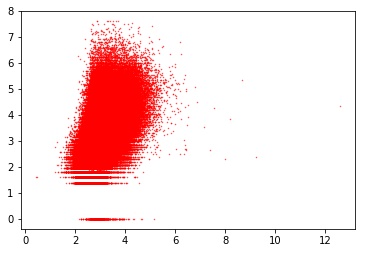

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_pred2,y_train, s = 0.2, c = "r", alpha = 0.8)
plt.show()

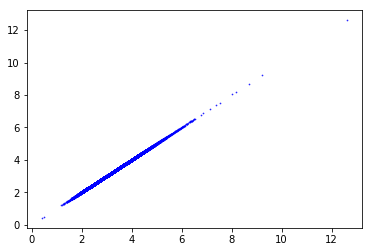

In [37]:
plt.scatter(y_pred2,y_pred1, s = 0.5, c = "b", alpha = 0.8)
plt.show()

Interestingly, we note that even after hyperparameter tuning, the predictive performance of the Ridge remained a the same level as they are making the same predictions. 

Next, we try to see if we can include interaction terms into the pipeline to see if we can improve model performance.

## Adding feature interaction terms into pipeline

This is a custom function that is compatible with SparseMatrices:

https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py

In [1]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

We save this function as SparseInteractions.py into our working directory in order to call it later for easy loading.

We will now modify our pipeline that incorporates the step that adds interaction terms. We will also include to load and process the holdout data for final validation.

In [4]:
import os
import pandas as pd
import numpy as np
import pickle

#############################################################################
# Re-read the training and hold out data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names= ["price"])
y_train = y_train.price.values

X_holdout = pd.read_csv("X_holdout.csv")
y_holdout = pd.read_csv("y_holdout.csv", header=None, names= ["price"])
y_holdout = y_holdout.price.values

#############################################################################
# Re-read the pickled feature names
import pickle
with open("Numeric_features.pkl", 'rb') as f:
    Numeric_features = pickle.load(f)
f.close()

with open("Text_features.pkl", 'rb') as f:
    Text_features = pickle.load(f)
f.close()
#############################################################################

def column_text_processer(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    
    # Convert all the text to lowercase and return as pd.Series object to enter the tokenization pipeline
    return text_vector.apply(lambda x: x.lower())  

#############################################################################

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import MaxAbsScaler, Imputer, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression

#############################################################################
# Utility functions to parse text and numeric features
get_numeric_data = FunctionTransformer(func = lambda x: x[Numeric_features], validate=False) #Note x is by default the tensor that contains all features
get_text_data = FunctionTransformer(column_text_processer,validate=False) # Note how we avoid putting any arguments into column_text_processer
#############################################################################

#############################################################################
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'   #Note this regex will match either a whitespace or a punctuation to tokenize the string vector on these preferences  

#############################################################################
# Define f_regression for feature selection to convert center = False default
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center = False) # default is center = True

#############################################################################
# Prepare the modified pipeline (pl2):

pl2 = Pipeline([
    
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        
        transformer_list = [
            
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red1', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    ("int", SparseInteractions(degree=2)), # Add polynomial interaction terms 
    ("scaler",MaxAbsScaler()), # Scale the features
    ('dim_red2', SelectKBest(f_regression, 400)) # Add another dimension reduction step at the end
])

Next, we will use the new pipeline (pl2) to transform X_train and X_holdout:

In [5]:
# We fit_transform X outside of the pipeline to obtain transformed X for hyperparameter search, 
# since transformation step takes long time and we want to avoid repeating everytime 
X_train_transformed = pl2.fit_transform(X_train,y_train)
X_holdout_transformed = pl2.fit_transform(X_holdout, y_holdout)

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: i

In [6]:
print(X_train_transformed.shape)
print(X_holdout_transformed.shape)

(889521, 400)
(593014, 400)


Note that as we designed, our pipelines provided data sets with 400 features at the end. Next, we fit the new Ridge model using the training set transformed by the modified pipeline (pl2):

In [9]:
from sklearn.metrics import mean_squared_error
model2 = Ridge(alpha=0.5)
model2.fit(X_train_transformed,y_train)
y_pred2 = model2.predict(X_train_transformed) 
np.sqrt(mean_squared_error(y_train,y_pred2))

0.64640722157857955

To calculate the RMSE in the holdout set:

In [10]:
y_pred2 = model2.predict(X_holdout_transformed) 
np.sqrt(mean_squared_error(y_holdout,y_pred2))

1.0222330776410204

It looks like addition of interaction terms did not increase model performance in our problem. Let's finally try hyperparameter tuning in this scenario:

In [13]:
from sklearn.model_selection import GridSearchCV
alphas = np.linspace(1,0,10)
param_grid = {"alpha":alphas}
# Instantiate the GridSearchCV object:
ridgemodel = Ridge()
ridge_cv = GridSearchCV(estimator= ridgemodel,
                        param_grid= param_grid,
                        scoring='neg_mean_squared_error',
                        cv = 5, 
                        n_jobs=-1)

# Fit the GridSearchCV object to training data to start parameter search:
ridge_cv.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([ 1.     ,  0.88889,  0.77778,  0.66667,  0.55556,  0.44444,
        0.33333,  0.22222,  0.11111,  0.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [14]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 0.11111111111111116}
-0.418277136487


In [15]:
from sklearn.metrics import mean_squared_error
y_pred2 = ridge_cv.predict(X_train_transformed) 
np.sqrt(mean_squared_error(y_train,y_pred2))

0.64638127028157599

In [16]:
y_pred2 = ridge_cv.predict(X_holdout_transformed) 
np.sqrt(mean_squared_error(y_holdout,y_pred2))

1.0569031945809519

Hyperparameter tuning has marginal impact on the model performance. As a final step, let's modify the pipeline 2, by removing the final feature selection step and see if that changes model performance:

In [17]:
# Prepare the modified pipeline (pl3):
pl3 = Pipeline([
    
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        
        transformer_list = [
            
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red1', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    ("int", SparseInteractions(degree=2)), # Add polynomial interaction terms 
    ("scaler",MaxAbsScaler()), # Scale the features
])

In [19]:
X_train_transformed = pl3.fit_transform(X_train, y_train)
X_holdout_transformed = pl3.fit_transform(X_holdout, y_holdout)

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: i

In [20]:
print(X_train_transformed.shape)
print(X_holdout_transformed.shape)

(889521, 45753)
(593014, 45753)


Note that by creating interaction terms, we increased the dimension of data enourmously. We will now try Ridge regularization to see if we can improve our previous model's performance:

In [21]:
from sklearn.metrics import mean_squared_error
model3 = Ridge(alpha = 0.5)
model3.fit(X_train_transformed,y_train)
ypred3 = model3.predict(X_train_transformed)

NameError: name 'y_pred3' is not defined

In [22]:
np.sqrt(mean_squared_error(y_train,ypred3))

0.57418678100605181

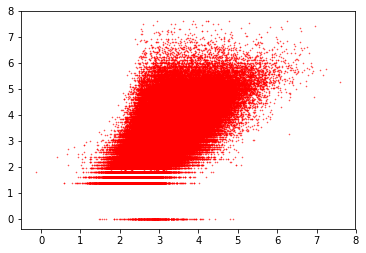

In [23]:
import matplotlib.pyplot as plt
plt.scatter(ypred3,y_train, s = 0.3, c = 'r', alpha = 0.7)
plt.show()

In [24]:
# To see the performance in the holdout set
ypred3_holdout = model3.predict(X_holdout_transformed)
np.sqrt(mean_squared_error(y_holdout,ypred3_holdout))


0.95170781413293182

Model performance is remarkably better. Therefore, we learned that once added the interaction terms, we can leave the features as they are, as long as we are tempted to perform regularization afterwards. 

However, one point we noticed here is that: if we perform fit_transform of the data set outside of the pipeline, this can potentially bias to X_holdout because new features are extracted. Instead, we should fit(train) the entire pipeline using the X_train and y_train, then only use predict with X_holdout. 

Let's incorporate the model step into our best performing pipeline, pl3:

In [1]:
import os
import pandas as pd
import numpy as np
import pickle

#############################################################################
# Re-read the training and hold out data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names= ["price"])
y_train = y_train.price.values

X_holdout = pd.read_csv("X_holdout.csv")
y_holdout = pd.read_csv("y_holdout.csv", header=None, names= ["price"])
y_holdout = y_holdout.price.values

#############################################################################
# Re-read the pickled feature names
import pickle
with open("Numeric_features.pkl", 'rb') as f:
    Numeric_features = pickle.load(f)
f.close()

with open("Text_features.pkl", 'rb') as f:
    Text_features = pickle.load(f)
f.close()
#############################################################################

def column_text_processer(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    
    # Convert all the text to lowercase and return as pd.Series object to enter the tokenization pipeline
    return text_vector.apply(lambda x: x.lower())  

#############################################################################

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import MaxAbsScaler, Imputer, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

#############################################################################
# Utility functions to parse text and numeric features
get_numeric_data = FunctionTransformer(func = lambda x: x[Numeric_features], validate=False) #Note x is by default the tensor that contains all features
get_text_data = FunctionTransformer(column_text_processer,validate=False) # Note how we avoid putting any arguments into column_text_processer
#############################################################################

#############################################################################
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'   #Note this regex will match either a whitespace or a punctuation to tokenize the string vector on these preferences  

#############################################################################
# Define f_regression for feature selection to convert center = False default
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center = False) # default is center = True

#############################################################################

pl3 = Pipeline([
    
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        
        transformer_list = [
            
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red1', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    ("int", SparseInteractions(degree=2)), # Add polynomial interaction terms 
    ("scaler",MaxAbsScaler()), # Scale the features
    ("reg",Ridge(alpha = 0.5)) # Add the RidgeRegression step using alpha = 0.5
])

NameError: name 'SparseInteractions' is not defined

In [26]:
# Train our pipeline using training set
pl3.fit(X_train,y_train)

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: i

Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_subpipeline', Pipeline(steps=[('parser', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x152b9e840>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False)),...it_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [27]:
# Make predictions first using the training set
y_pred3 = pl3.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred3))

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


0.57418695057696534

As we expected, we were able to reproduce the rmse using the pipeline object's predictions.

In [28]:
# Make predictions using the holdout set
y_pred3 = pl3.predict(X_holdout)
np.sqrt(mean_squared_error(y_holdout,y_pred3))

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


0.60209449047700869

Very nice! Now we learned that it is essential to only include the modeling step inside the pipeline. We notice that the performance of our pipeline in the holdout set is actually quite good, better than any model we used before. We note that this is a data set the pipeline has not seen before. 

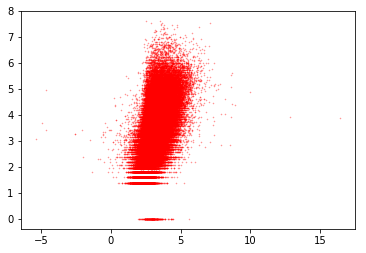

In [29]:
plt.scatter(y_pred3,y_holdout, s = 0.3, c = "r", alpha = 0.4)
plt.show()

Next, let's try to perform Gridsearch over the pipeline3 we established. This way we will try to learn:

1. How to perform Gridsearch using an entire pipeline: tuning multiple hyperparameters
2. How to improve computational efficiency of this process (read Pipeline documentation, e.g: cache)
3. To understand if we can further improve the performance of the existing pipeline!

## GridSearch using entire Ridge pipeline

Let's get started by loading our data sets, utility functions and the latest pipeline using which we would like to perform hyperparameter tuning:

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
from SparseInteractions import * #Load SparseInteractions as a module since it was saved into working directory as SparseInteractions.py

#############################################################################
# Re-read the training and hold out data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names= ["price"])
y_train = y_train.price.values

X_holdout = pd.read_csv("X_holdout.csv")
y_holdout = pd.read_csv("y_holdout.csv", header=None, names= ["price"])
y_holdout = y_holdout.price.values

#############################################################################
# Re-read the pickled feature names
import pickle
with open("Numeric_features.pkl", 'rb') as f:
    Numeric_features = pickle.load(f)
f.close()

with open("Text_features.pkl", 'rb') as f:
    Text_features = pickle.load(f)
f.close()
#############################################################################

def column_text_processer(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    
    # Convert all the text to lowercase and return as pd.Series object to enter the tokenization pipeline
    return text_vector.apply(lambda x: x.lower())  

#############################################################################

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import MaxAbsScaler, Imputer, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

#############################################################################
# Utility functions to parse text and numeric features
get_numeric_data = FunctionTransformer(func = lambda x: x[Numeric_features], validate=False) #Note x is by default the tensor that contains all features
get_text_data = FunctionTransformer(column_text_processer,validate=False) # Note how we avoid putting any arguments into column_text_processer
#############################################################################

#############################################################################
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'   #Note this regex will match either a whitespace or a punctuation to tokenize the string vector on these preferences  

#############################################################################
# Define f_regression for feature selection to convert center = False default
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center = False) # default is center = True

#############################################################################

pl3 = Pipeline([
    
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        
        transformer_list = [
            
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red1', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    ("int", SparseInteractions(degree=2)), # Add polynomial interaction terms 
    ("scaler",MaxAbsScaler()), # Scale the features
    ("reg",Ridge(alpha = 0.5)) # Add the RidgeRegression step using alpha = 0.5
])

Let's look into the potential parameters we can tune in our pipeline, using .get_params() method of the pipeline object:

In [3]:
pl3.get_params()

{'int': SparseInteractions(degree=2, feature_name_separator='_'),
 'int__degree': 2,
 'int__feature_name_separator': '_',
 'memory': None,
 'reg': Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 'reg__alpha': 0.5,
 'reg__copy_X': True,
 'reg__fit_intercept': True,
 'reg__max_iter': None,
 'reg__normalize': False,
 'reg__random_state': None,
 'reg__solver': 'auto',
 'reg__tol': 0.001,
 'scaler': MaxAbsScaler(copy=True),
 'scaler__copy': True,
 'steps': [('union', FeatureUnion(n_jobs=1,
          transformer_list=[('numeric_subpipeline', Pipeline(memory=None,
        steps=[('parser', FunctionTransformer(accept_sparse=False,
             func=<function <lambda> at 0x111756f28>, inv_kw_args=None,
             inverse_func=None, kw_args=None, pass_y='deprecated',
             validate=False)), ('imputer',...izer=None)), ('dim_red1', SelectKBest(k=300, score_func=<function f_regression at 0x1036cd6a8>))]))]

In [ ]:
# We notice that the following parameters would be intuitive to tune through GridSearchCV:

'reg__alpha': 0.5
'union__text_subpipeline__dim_red1__k': 300,
'union__text_subpipeline__tokenizer__ngram_range': (1, 3)
'int__degree': 2

# Let's set up a hyperparameter space to use GridSearchCV:

In [4]:
param_grid = {
    'reg__alpha': np.linspace(1,0,10),
    'union__text_subpipeline__dim_red1__k': [200,300,400],
    'union__text_subpipeline__tokenizer__ngram_range': [(1,3),(1,4)], # We will tokenize for up to 4-grams 
    'int__degree': [2,3] # We will add up to the third polymonial degree interactions 
}

Now we will set up our GridSearchCV estimator using the hyperparameter space we just defined. 

As a slight modification, here we will use the memory and cache functions of the sklearn in order to save some time in computations.

### Catching the transformers within a pipeline

In [10]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# We first create a temporary folder to store the transformers of our pipeline
temp_folder = mkdtemp()
memory = Memory(cachedir= temp_folder, verbose= 10) # Create our memory 

# Next we need to redefine our pipeline3 with a memory argument to pass the memory we created
memorized_pipeline3 = Pipeline(steps=[
    
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        
        transformer_list = [
            
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red1', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    ("int", SparseInteractions(degree=2)), # Add polynomial interaction terms 
    ("scaler",MaxAbsScaler()), # Scale the features
    ("reg",Ridge(alpha = 0.5)) # Add the RidgeRegression step using alpha = 0.5
    
], memory = memory) 


# Now we are using the catched (memorized) pipeline for GridSearchCV, 
    # using 3-fold cross-validation
    # using the parameter grid space we defined above
    
pl3grid = GridSearchCV(memorized_pipeline3, cv = 3, n_jobs= 1, param_grid= param_grid,scoring='neg_mean_squared_error')

# Finally, we start training the pipeline with GridSearchCV, using the .fit() method and training set:
pl3grid.fit(X_train,y_train)

# We need to delete the temporary folder before we exit the training task to allow the memory back to system
rmtree(temp_folder)

PicklingError: ("Can't pickle <function <lambda> at 0x111756f28>: it's not found as __main__.<lambda>", 'PicklingError while hashing {\'transformer\': FeatureUnion(n_jobs=1,\n       transformer_list=[(\'numeric_subpipeline\', Pipeline(memory=None,\n     steps=[(\'parser\', FunctionTransformer(accept_sparse=False,\n          func=<function <lambda> at 0x111756f28>, inv_kw_args=None,\n          inverse_func=None, kw_args=None, pass_y=\'deprecated\',\n          validate=False)), (\'imputer\',...izer=None)), (\'dim_red1\', SelectKBest(k=200, score_func=<function f_regression at 0x1036cd6a8>))]))],\n       transformer_weights=None), \'weight\': None, \'X\':                                              name  item_condition_id  \\\n296507         Fluffy pom pom knit infinity scarf                  4   \n296508            Flannel Abercrombie button down                  2   \n296509                            RAE DUNN BUNDLE                  1   \n296510                          Baby girl blanket                  1   \n296511                 New lularoe os cool pandas                  1   \n296512                     Nike Air Presto (wmns)                  2   \n296513                      7y nike nike free 5.0                  3   \n296514    Bundle 2pairs of jeans and I pair chino                  1   \n296515        LuLaRoe OS raccoons nwt unicorn HTF                  1   \n296516                              VS Pink socks                  3   \n296517                               Cactus Decal                  1   \n296518                              Beats Mix Pro                  3   \n296519                   NWT Lularoe Nicole small                  1   \n296520                            VS PINK M Lexie                  1   \n296521               Kendra Scoot Bexley Earrings                  1   \n296522                            Women\'s Sweater                  1   \n296523                      Cartier Love Bracelet                  1   \n296524                         Black toddler vans                  3   \n296525       White House Black Market Skirt White                  3   \n296526               2 shirts + makeup bag bundle                  3   \n296527   SALE.!! 2 LARGE PINK BOYSHORTS FREE SHIP                  1   \n296528                      Victoria\'s Secret hat                  1   \n296529        Bandolino Madia Dress Sandals Black                  2   \n296530               Pittsburgh Steelers Headband                  1   \n296531                         Under Amour Hoodie                  3   \n296532     Littlest pet shop clothing accessories                  3   \n296533                           Funko pop Elvira                  1   \n296534     Levies women\'s 10 Long classic bootcut                  3   \n296535      High wasted swimsuit READ DESCRIPTION                  1   \n296536                    Harry Potter adult robe                  3   \n...                                           ...                ...   \n889491        Gain Laundry & Colgate & Angel Soft                  1   \n889492     Bright pink iridescent faux druzy ring                  1   \n889493                          Iphone 5 gun case                  4   \n889494         NWT! Vans 1.5 (Mesh) Eclipse/White                  1   \n889495   ✨Anastacia Beverly Hills, Medium to Tan✨                  3   \n889496    Livin free eagle texas graphic mesh tee                  2   \n889497                    Bundle of 2 Summer Tops                  1   \n889498           Festival Crochet Halter Crop Top                  3   \n889499  SUPERSALE APPLE iPhone 6 Charger [rm]each                  1   \n889500     NWT Urban Republic boys hoodie coat 4T                  1   \n889501                Vintage by Jeffrey Campbell                  3   \n889502                              Nude Bodysuit                  2   \n889503                          Men\'s Nixon watch                  3   \n889504                                    2 Black                  2   \n889505   Nike air shoes size 6C toddler baby girl                  2   \n889506                          Mary Kay Compacts                  1   \n889507                         VS bronzing mousse                  1   \n889508                      Retro 5s sons of mars                  3   \n889509    Kat Von D Holographic Alchemist Palette                  2   \n889510                  Earrings and necklace set                  1   \n889511            4 LIFE IMPROVEMENT BOOKS BUNDLE                  3   \n889512               3 pc mini Chanel makeup pack                  1   \n889513                              Learn crochet                  3   \n889514          Reserved for BUKA - WDW Purple SE                  4   \n889515          Fitbit Charge 2 Band - Light Pink                  1   \n889516                          Cute summer dress                  1   \n889517                Garnier Fructis Conditioner                  1   \n889518                                     Bundle                  3   \n889519            TMNT Raphael Costume (8) f/ship                  1   \n889520                  Medium one piece swimsuit                  1   \n\n                                            category_name  \\\n296507          Women/Women\'s Accessories/Scarves & Wraps   \n296508             Women/Tops & Blouses/Button Down Shirt   \n296509     Home/Kitchen & Dining/Coffee & Tea Accessories   \n296510                               Kids/Nursery/Bedding   \n296511     Women/Athletic Apparel/Pants, Tights, Leggings   \n296512                               Women/Shoes/Athletic   \n296513                               Women/Shoes/Athletic   \n296514                             Men/Jeans/Slim, Skinny   \n296515                               Women/Jeans/Leggings   \n296516                       Women/Athletic Apparel/Socks   \n296517                       Handmade/Paper Goods/Sticker   \n296518    Electronics/TV, Audio & Surveillance/Headphones   \n296519                          Women/Dresses/Knee-Length   \n296520                            Women/Underwear/Panties   \n296521                             Women/Jewelry/Earrings   \n296522                            Women/Sweaters/Cardigan   \n296523                            Women/Jewelry/Bracelets   \n296524                              Kids/Boys 2T-5T/Shoes   \n296525                      Women/Skirts/Straight, Pencil   \n296526                    Kids/Boys 2T-5T/Tops & T-Shirts   \n296527                            Women/Underwear/Panties   \n296528                     Women/Women\'s Accessories/Hats   \n296529                                Women/Shoes/Sandals   \n296530                     Sports & Outdoors/Fan Shop/NFL   \n296531                              Women/Sweaters/Hooded   \n296532                      Kids/Toys/Dolls & Accessories   \n296533           Vintage & Collectibles/Toy/Action Figure   \n296534                               Women/Jeans/Boot Cut   \n296535                           Women/Swimwear/Two-Piece   \n296536                                  Other/Other/Other   \n...                                                   ...   \n889491          Home/Cleaning Supplies/Household Cleaners   \n889492                                Women/Jewelry/Rings   \n889493  Electronics/Cell Phones & Accessories/Cases, C...   \n889494                       Women/Shoes/Fashion Sneakers   \n889495                      Beauty/Makeup/Makeup Palettes   \n889496                    Women/Tops & Blouses/Tank, Cami   \n889497                    Women/Tops & Blouses/Tank, Cami   \n889498                        Women/Tops & Blouses/Halter   \n889499  Electronics/Cell Phones & Accessories/Cables &...   \n889500                     Kids/Boys (4+)/Coats & Jackets   \n889501                          Women/Shoes/Mules & Clogs   \n889502                           Women/Swimwear/One-Piece   \n889503                      Men/Men\'s Accessories/Watches   \n889504                        Women/Tops & Blouses/Blouse   \n889505                             Kids/Girls 2T-5T/Shoes   \n889506                                 Beauty/Makeup/Eyes   \n889507                             Beauty/Fragrance/Women   \n889508                                 Men/Shoes/Athletic   \n889509                      Beauty/Makeup/Makeup Palettes   \n889510                            Women/Jewelry/Necklaces   \n889511                  Vintage & Collectibles/Book/Other   \n889512  Beauty/Tools & Accessories/Makeup Brushes & Tools   \n889513                          Handmade/Patterns/Crochet   \n889514                        Kids/Girls 0-24 Mos/Dresses   \n889515      Sports & Outdoors/Exercise/Fitness technology   \n889516                     Women/Dresses/Above Knee, Mini   \n889517        Beauty/Hair Care/Shampoo & Conditioner Sets   \n889518                             Kids/Girls 2T-5T/Shoes   \n889519                  Kids/Toys/Dress Up & Pretend Play   \n889520                           Women/Swimwear/One-Piece   \n\n                      brand_name  shipping  \\\n296507                       NaN         0   \n296508       Abercrombie & Fitch         0   \n296509                  Rae Dunn         0   \n296510                       NaN         1   \n296511                       NaN         1   \n296512                      Nike         1   \n296513                      Nike         0   \n296514                       NaN         1   \n296515                       NaN         0   \n296516                      PINK         1   \n296517                       NaN         1   \n296518          Beats by Dr. Dre         0   \n296519                   LuLaRoe         0   \n296520         Victoria\'s Secret         1   \n296521              Kendra Scott         1   \n296522            New Directions         0   \n296523                   Cartier         0   \n296524                       NaN         0   \n296525  White House Black Market         0   \n296526                       NaN         0   \n296527                      PINK         1   \n296528         Victoria\'s Secret         0   \n296529                 Bandolino         0   \n296530                       NaN         1   \n296531              Under Armour         1   \n296532                    Hasbro         0   \n296533                     Funko         0   \n296534                   Levi\'s®         0   \n296535                       NaN         0   \n296536                       NaN         1   \n...                          ...       ...   \n889491                       NaN         0   \n889492                       NaN         1   \n889493                       NaN         1   \n889494                      VANS         1   \n889495                   Sephora         1   \n889496                FOREVER 21         0   \n889497                       NaN         1   \n889498                       NaN         0   \n889499                     Apple         1   \n889500                   Arizona         0   \n889501          Jeffrey Campbell         0   \n889502                FOREVER 21         0   \n889503                     Nixon         0   \n889504                   Express         0   \n889505                      Nike         0   \n889506                  Mary Kay         0   \n889507         Victoria\'s Secret         1   \n889508                    Jordan         0   \n889509                 Kat Von D         0   \n889510                       NaN         1   \n889511                       NaN         0   \n889512                    Chanel         1   \n889513                       NaN         0   \n889514                       NaN         1   \n889515                       NaN         1   \n889516                     Ariat         0   \n889517                   Garnier         0   \n889518                  Gymboree         0   \n889519                       NaN         1   \n889520                       NaN         1   \n\n                                         item_description  \n296507  Cute cream colored infinity scarf with knit po...  \n296508  Flannel shirt by Abercrombie. Size large. Supe...  \n296509  PRICE IS FOR ALL THREE // CANT BE BOUGHT SEPAR...  \n296510  I can take off the hanger if you would like ju...  \n296511  New lularoe one size cool pandas with glasses ...  \n296512  Size 7, brand new never worn! Ended up finding...  \n296513  Women size 9 Good conditions Fast shipping No ...  \n296514  Reserved for Mess_cx I pair of Bullhead light ...  \n296515  LuLaRoe OS size raccoon leggings. Red and blue...  \n296516  EUC These have been washed, I attempted to wea...  \n296517      4 " Decal Yeti decal Monogram decal Car decal  \n296518                     Works perfectly In great shape  \n296519  Gorgeous floral Nicole dress. Textured black w...  \n296520  NEW W TAGS 3 pair BOYSHORTs Medium ( 3 for 25)...  \n296521              Dust Bag Included These are a beauty!  \n296522  Size XL but fits like a large. Brand new. Very...  \n296523  Brand new in box with logos on bracelet. Made ...  \n296524  Color Black on black. Toddler size 7. Great co...  \n296525  Versatile- wear on a casual or\xa0work\xa0day! Side\xa0...  \n296526  """"""""""""""""""""""""""""" Paw Patrol is a ...  \n296527  FREE SHIPPING PRICE IS FIRM CUTE SEXY VS PINK ...  \n296528                                Brand new black hat  \n296529  Bandolino Madia Dress Sandal - Size 7 - Black ...  \n296530  Pittsburgh Steelers twisted headband A lot of ...  \n296531  Women\'s Small Under Armour Hoodie In great con...  \n296532                         Lot of 7 blue accessories!  \n296533                          Elvira In good condition.  \n296534  Classic relaxed bootcut. Has some stretch. Exc...  \n296535  Top is size large. Bottom is size small. Willi...  \n296536                                  Size small/medium  \n...                                                   ...  \n889491  ➡ NOT A DUPLICATED LISTING ⬅ Three Packs Of An...  \n889492  Handmade by me, 12mm, faux Druzy bead on gold ...  \n889493  Gun case for iphone 5/5s Got some damage on it...  \n889494  Size 8.5 in Women Retail Price [rm]+Tax BRAND ...  \n889495  ✨Anastacia Beverly Hills, Medium to Tan✨ Retai...  \n889496  This is a size small muscle style tank top. Ha...  \n889497                 Both are new with tag Size: Medium  \n889498  Very stylish crochet too perfect for summer an...  \n889499                                      Free Shipping  \n889500  NEW with tags size 4T Smoke free home Puffy ve...  \n889501          Jeffrey Campbell size 9.5 brown tan shoes  \n889502  From F21. Never really wore it. I love the ope...  \n889503              Its in great condition battery\'s fine  \n889504                                 No description yet  \n889505  Excellent condition Nike free 5.0 shoes size 6...  \n889506  Includes 3 never used compacts! Great for priz...  \n889507  Two Victoria Secret instant glow bronzing mous...  \n889508                             Size 10 8/10 condition  \n889509  -holographic highlight shades only swatched on...  \n889510                                           HOLD ***  \n889511  4 LIFE IMPROVEMENT BOOKS BUNDLE. All in great ...  \n889512  Makeup remover, foundation and roll on perfume...  \n889513  Learn crochet. A book to teach you the basics ...  \n889514  Hand washed and laid flat to dry (needs ironed...  \n889515  This Fitbit Charge 2 Band is a size SMALL. SIZ...  \n889516  Brand new with tags size xl Ariat dress. Breez...  \n889517  3 bottles damage eraser 1 Brazilian smooth 1 s...  \n889518  good condition scratched from the front a bit,...  \n889519  New! Teenage Mutant Ninja Turtles Raphael cost...  \n889520                                 No description yet  \n\n[593014 rows x 6 columns], \'y\': array([ 2.07944154,  2.63905733,  3.61091791, ...,  3.40119738,\n        2.77258872,  2.7080502 ]), \'**\': {}}: PicklingError("Can\'t pickle <function <lambda> at 0x111756f28>: it\'s not found as __main__.<lambda>",)')

Based on [https://github.com/scikit-learn/scikit-learn/issues/1645] this discussion it appears that the serialization we attempt to make uses pickle, which is not compatible with lambda functions. We notice that the lambda functions appear in our pipeline at the custom utility functions we wrote. Therefore, we need to rewrite these utility functions to make them compatible with the serialization process:

In [43]:
def column_text_processer_nolambda(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    # text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    text_vector = []
    for index,rows in text_data.iterrows():
        text_item = " ".join(rows).lower()
        text_vector.append(text_item)

    # return text_vector as pd.Series object to enter the tokenization pipeline
    return pd.Series(text_vector) 

def column_numeric_processer_nolambda(df,numeric_columns = Numeric_features):
    return df[numeric_columns]

#############################################################################
# Utility functions to parse text and numeric features
get_numeric_data = FunctionTransformer(func = column_numeric_processer_nolambda, validate=False) 
get_text_data = FunctionTransformer(column_text_processer_nolambda,validate=False) # Note how we avoid putting any arguments into column_text_processer
#############################################################################

Now, let's redefine our entire data reading and pre-processing pipeline with these custom functions:

In [83]:
import os
import pandas as pd
import numpy as np
import pickle
from SparseInteractions import * #Load SparseInteractions as a module since it was saved into working directory as SparseInteractions.py

#############################################################################
# Re-read the training and hold out data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names= ["price"])
y_train = y_train.price.values

X_holdout = pd.read_csv("X_holdout.csv")
y_holdout = pd.read_csv("y_holdout.csv", header=None, names= ["price"])
y_holdout = y_holdout.price.values

#############################################################################
# Re-read the pickled feature names
import pickle
with open("Numeric_features.pkl", 'rb') as f:
    Numeric_features = pickle.load(f)
f.close()

with open("Text_features.pkl", 'rb') as f:
    Text_features = pickle.load(f)
f.close()
#############################################################################
# Custom utility functions to parse out numeric and text data

def column_text_processer_nolambda(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    # text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    text_vector = []
    for index,rows in text_data.iterrows():
        text_item = " ".join(rows).lower()
        text_vector.append(text_item)

    # return text_vector as pd.Series object to enter the tokenization pipeline
    return pd.Series(text_vector) 

def column_numeric_processer_nolambda(df,numeric_columns = Numeric_features):
    return df[numeric_columns]

#############################################################################

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import MaxAbsScaler, Imputer, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

#############################################################################
# FunctionTransformer wrapper of utility functions to parse text and numeric features
get_numeric_data = FunctionTransformer(func = column_numeric_processer_nolambda, validate=False) 
get_text_data = FunctionTransformer(column_text_processer_nolambda,validate=False) # Note how we avoid putting any arguments into column_text_processer  
#############################################################################

#############################################################################
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'   #Note this regex will match either a whitespace or a punctuation to tokenize the string vector on these preferences  

#############################################################################
# Define f_regression for feature selection to convert center = False default
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center = False) # default is center = True

#############################################################################

Finally, we re-define our memorized pipeline together with hyperparameter search space:

In [82]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# We first create a temporary folder to store the transformers of our pipeline
temp_folder = mkdtemp()
memory = Memory(cachedir= temp_folder, verbose= 10) # Create our memory 


# Next we need to redefine our pipeline3 with a memory argument to pass the memory we created
memorized_pipeline3 = Pipeline(steps=[
    
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        
        transformer_list = [
            
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red1', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    ("int", SparseInteractions(degree=2)), # Add polynomial interaction terms 
    ("scaler",MaxAbsScaler()), # Scale the features
    ("reg",Ridge(alpha = 0.5)) # Add the RidgeRegression step using alpha = 0.5
    
], memory = memory) 

# Our hyperparameter grid
param_grid = {
    'reg__alpha': np.linspace(1,0,10),
    'union__text_subpipeline__dim_red1__k': [200,300,400],
    'union__text_subpipeline__tokenizer__ngram_range': [(1,3),(1,4)], # We will tokenize for up to 4-grams 
    'int__degree': [2,3] # We will add up to the third polymonial degree interactions 
}


# Now we are using the catched (memorized) pipeline for GridSearchCV, 
    # using 3-fold cross-validation
    # using the parameter grid space we defined above

  
pl3grid = GridSearchCV(memorized_pipeline3, 
                       cv = 3, 
                       n_jobs= 1, 
                       param_grid= param_grid,
                       scoring='neg_mean_squared_error')


# Finally, we start training the pipeline with GridSearchCV, using the .fit() method and training set:
pl3grid.fit(X_train,y_train)

# We need to delete the temporary folder before we exit the training task to allow the memory back to system
rmtree(temp_folder)

ImportError: [joblib] Attempting to do parallel computing without protecting your import on a system that does not support forking. To use parallel-computing in a script, you must protect your main loop using "if __name__ == '__main__'". Please see the joblib documentation on Parallel for more information

In [79]:
from multiprocessing import cpu_count
cpu_count()

4

Our take home messages:

1. Using cache option to memorize steps with large data sets and a complex pipeline is not feasible. Computer crashes.
2. The n_jobs = -1 parallelization using joblib interface of sklearn is not functional. The error seems to persist as of March 2018.

Therefore, our next solution could be using Dask package or spark-sklearn for paralelization. They appear to have their own problems though.

Until we have a good understanding the nature of these problems, we should avoid ambitious hyperparameter optimization using GridSearchCV, and tune few parameters at a given time instead.

# Searching a better Ridge pipeline using RandomizedSearchCV

Yes, we realized it is not feasible to use an exhaustive GridSearchCV for hyperparameter optimization given the size of the training data and our limited computational power. However, we should still give a try to RandomSearchCV, where we can test 10 or 20 iterations to randomly pick combinations of parameters from our hyperparameter bucket and see if we can get a model with better performance. This is in a way a matter of luck and waiting game, but nothing should stop us from trying, give there is a possiblity of finding a slighly better performing model. 

First we get our Ridge pipeline and hyperparameter space as usual:


In [1]:
import os
import pandas as pd
import numpy as np
import pickle
from SparseInteractions import * #Load SparseInteractions as a module since it was saved into working directory as SparseInteractions.py

#############################################################################
# Re-read the training and hold out data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names= ["price"])
y_train = y_train.price.values

X_holdout = pd.read_csv("X_holdout.csv")
y_holdout = pd.read_csv("y_holdout.csv", header=None, names= ["price"])
y_holdout = y_holdout.price.values

#############################################################################
# Re-read the pickled feature names
import pickle
with open("Numeric_features.pkl", 'rb') as f:
    Numeric_features = pickle.load(f)
f.close()

with open("Text_features.pkl", 'rb') as f:
    Text_features = pickle.load(f)
f.close()
#############################################################################
# Custom utility functions to parse out numeric and text data

def column_text_processer_nolambda(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    # text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    text_vector = []
    for index,rows in text_data.iterrows():
        text_item = " ".join(rows).lower()
        text_vector.append(text_item)

    # return text_vector as pd.Series object to enter the tokenization pipeline
    return pd.Series(text_vector) 

def column_numeric_processer_nolambda(df,numeric_columns = Numeric_features):
    return df[numeric_columns]

#############################################################################

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import MaxAbsScaler, Imputer, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

#############################################################################
# FunctionTransformer wrapper of utility functions to parse text and numeric features
get_numeric_data = FunctionTransformer(func = column_numeric_processer_nolambda, validate=False) 
get_text_data = FunctionTransformer(column_text_processer_nolambda,validate=False) # Note how we avoid putting any arguments into column_text_processer  
#############################################################################

#############################################################################
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'   #Note this regex will match either a whitespace or a punctuation to tokenize the string vector on these preferences  

#############################################################################
# Define f_regression for feature selection to convert center = False default
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center = False) # default is center = True

#############################################################################
# Next we define our pipeline:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


pl3 = Pipeline([
    
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        
        transformer_list = [
            
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red1', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    ("int", SparseInteractions(degree=2)), # Add polynomial interaction terms 
    ("scaler",MaxAbsScaler()), # Scale the features
    ("reg",Ridge(alpha = 0.5)) # Add the RidgeRegression step using alpha = 0.5
])

# We define our hyperparameter grid from which we will randomly select a combination per RandomizedSeachCV iteration
param_grid = {
    'reg__alpha': np.linspace(1,0,10),
    'union__text_subpipeline__dim_red1__k': [200,300,400],
    'union__text_subpipeline__tokenizer__ngram_range': [(1,3),(1,4)], # We will tokenize for up to 4-grams 
}


Finally we perform RandomizedSeachCV from the defined hyperparameter space:

In [ ]:
import datetime
start = datetime.datetime.now()
print("train start :"+ str(start))

# Now we are using the catched (memorized) pipeline for GridSearchCV, 
    # using 2-fold cross-validation at this stage
    # using the parameter grid space we defined above

  
pl3randomized= RandomizedSearchCV(pl3, cv = 2, param_distributions= param_grid, n_jobs= -1,
                       scoring='neg_mean_squared_error',verbose = 1)


# Finally, we start training the pipeline with GridSearchCV, using the .fit() method and training set:
pl3randomized.fit(X_train,y_train)


import datetime
start = datetime.datetime.now()
print("train start :"+ str(start))

train start :2018-03-04 12:02:57.007283
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaco

# Training the pipeline using RandomForest regressor

Let's try to modify our best performing pipeline 3 above by changing the regressor to RandomForest, starting with its default parameters, we will try to see if we can get a better model performance without performing any hyperparameter tuning. Note that in this case we will add another feature selection step in the pipeline before using the RandomForest model since we are not performing regularization in this case:

In [5]:
import os
import pandas as pd
import numpy as np
import pickle
from SparseInteractions import * #Load SparseInteractions as a module since it was saved into working directory as SparseInteractions.py

#############################################################################
# Re-read the training and hold out data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names= ["price"])
y_train = y_train.price.values

X_holdout = pd.read_csv("X_holdout.csv")
y_holdout = pd.read_csv("y_holdout.csv", header=None, names= ["price"])
y_holdout = y_holdout.price.values

#############################################################################
# Re-read the pickled feature names
import pickle
with open("Numeric_features.pkl", 'rb') as f:
    Numeric_features = pickle.load(f)
f.close()

with open("Text_features.pkl", 'rb') as f:
    Text_features = pickle.load(f)
f.close()
#############################################################################

def column_text_processer(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    
    # Convert all the text to lowercase and return as pd.Series object to enter the tokenization pipeline
    return text_vector.apply(lambda x: x.lower())  

#############################################################################

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import MaxAbsScaler, Imputer, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

#############################################################################
# Utility functions to parse text and numeric features
get_numeric_data = FunctionTransformer(func = lambda x: x[Numeric_features], validate=False) #Note x is by default the tensor that contains all features
get_text_data = FunctionTransformer(column_text_processer,validate=False) # Note how we avoid putting any arguments into column_text_processer
#############################################################################

#############################################################################
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'   #Note this regex will match either a whitespace or a punctuation to tokenize the string vector on these preferences  

#############################################################################
# Define f_regression for feature selection to convert center = False default
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center = False) # default is center = True

#############################################################################

pl4 = Pipeline([
    
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        
        transformer_list = [
            
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red1', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    ("int", SparseInteractions(degree=2)), # Add polynomial interaction terms 
    ("scaler",MaxAbsScaler()), # Scale the features
    ('dim_red2', SelectKBest(f_regression, 300)),
    ("reg",RandomForestRegressor(n_jobs = -1, max_depth= 50)) # We start with these parameters of randomforest
])

Next we train our pipeline using .fit method as before:

In [7]:
import datetime
start = datetime.datetime.now()
print("train start :"+ str(start))

pl4.fit(X_train,y_train)

end = datetime.datetime.now()
print("train end :"+ str(end))

train start :2018-03-02 20:36:31.218289


/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  

train end :2018-03-03 16:54:33.120825


Using all CPU power we have (n_jobs = -1 argument in RandomForest), it took about 21 hours to train the RandomForest model even without any cross-validation with the ~800K samples and 300 features. 

This demonstrates that performing cross-validation or hyperparameter search with this model with this amount of training data is not feasible in our computational capacity.

Let's have a look at our predictions and compare to the Ridge pipeline we trained above:

In [11]:
y_pred4_train = pl4.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred4_train))

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


0.48194551256309565

It looks like RandomForest fits into the training set better than the untuned Ridge. Let's look at the performance in the holdout set:

In [12]:
# Make predictions using the holdout set
y_pred4_holdout = pl4.predict(X_holdout)
np.sqrt(mean_squared_error(y_holdout,y_pred4_holdout))

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


0.63547130284493558

This is quite interesting. It appears that untuned RandomForest pipeline overfits to the training set compared to untuned Ridge model. This is another nice example that a simple regularized model can perform better than a untuned complex algorithm like RandomForest.

We should remember that if we had the computational power to perform hyperparameter tuning using RandomForest, we would probably find a better performing model. However, in this case computational limitations determine the most feasible model.

In the next experiment, we will try to develop an intuition to use boosted trees for the same problem by employing XGboost package.